# 1。二分类贝叶斯判别

|  | w1 | w2 | ------------阈值------------ |
| --- | --- | --- | --- |
| p(wi\|x)(max) | p(w1\|x)>p(w2\|x) | p(w1\|x)>p(w2\|x) | 1 |
| p(x\|wi)p(wi)(max) | p(x\|w1)p(w1) > p(x\|w2)p(w2) | p(x\|w1)p(w1) < p(x\|w2)p(w2) | 1 |
| $ I_{12} $似然比(分割) | $ I_{12}= {{p(x|w1)} \over {p(x|w2)}} >{  {p(w2)} \over {p(w1)}} $ | $ I_{21}={{p(x|w1)} \over {p(x|w2)}} < {{p(w2)} \over {p(w1)}} $ | $ \theta_{21}= {{p(w2)} \over {p(w1)}}$ |
| 条件平均风险(min) | r1(x)<r2(x) | r1(x)>r2(x) | $ \theta_{21}= {{p(w2)} \over {p(w1)}}{{L_{21}-L_{22}} \over {L_{12}-L_{11}}}$ |
| 正态模式（ max） | d1(x)>d2(x) | d2(x)>d1(x) | $ d_i(x)=ln p(w_i)-{{1} \over {2}}ln|C_i| -{{1} \over {2}}(x-m_i)^TC_i^{-1}(x-m_i) ，d_1(x)-d_2(x)=0为判别界面 $ |

*  p(wi\|x) ：后验概率
* 贝叶斯定理：$ p(wi|x)= {{p(x|w1)p(w1)} \over {\Sigma_{i=1}^2 p(x|wi)p(wi)}}  $
    * $ p(x)={\Sigma_{i=1}^2 p(x|wi)p(wi)} $是常数
* p(wi)：先验概率
* p(x|wi)：似然概率
* 判决阈值$ \theta_{21}= {{p(w2)} \over {p(w1)}}$
* 当L11=L22=0,L12=L21=1时，贝叶斯最小风险判别与贝叶斯判别一样

# 2.M类分类

| M类分类 | ------------判别函数------------------------ | ------------wi------------ |
| --- | --- | --- |
| 条件平均风险(min) | $ r_{j}(x)=\Sigma_{i=1}^M L_{ij} P(w_i|x)={\Sigma_{i=1}^M L_{ij} P(x|w_i)p(w_i)} $ | ri(x)<rj(x) |
| 条件平均风险(max) | $ ri=p(x)-P(x|w_i)p(w_i) $ | $ P(x|w_i)p(w_i)>P(x|w_j)p(w_j) $ |
| 条件平均风险(max) | $ di=P(x|w_i)p(w_i) $ | $ d_i(x)>d_j(x) $ |
| 正态分布模式(似然为正态,max) | $ d_i(x)=ln p(w_i)-{{1} \over {2}}ln|C_i| -{{1} \over {2}}(x-m_i)^TC_i^{-1}(x-m_i) $  | $ d_i(x)>d_j(x) $ |


## 2.1 贝叶斯最小风险判别
* 对某一类的错误分类，比对另一类的分类更关键
* 条件平均风险：rj(x)
    * M类分类：
        * 观察样本（第i类）被分类为wj类的rj(x)---被正确分+被错分的
            * $ r_{j}(x)=\Sigma_{i=1}^M L_{ij} P(w_i|x) $
                * $ L_{ij} $:将是i的模式被判别为wj类的代价--分错时失分
                    * i=j,分类正确，为负或0
                    * i!=j,分类错误，失分，为正
                * $ P(w_i|x) $:模式x属于wi的概率，后验概率
            * 分给rj(x)最小的j
        * 贝叶斯公式：$ r_{j}(x)=\Sigma_{i=1}^M L_{ij} P(w_i|x)={{\Sigma_{i=1}^M L_{ij} P(x|w_i)p(w_i)} \over {p(x)}}$
            * p(x):公共项，可略
            * $ r_{j}(x)={\Sigma_{i=1}^M L_{ij} P(x|w_i)p(w_i)} $
                * 当L=0,i=j;L=1,i!=j时
                * $ =L_{1j}P(x|w_1)p(w1)+...+L_{jj}P(x|w_j)p(w_j)+...+L_{Mj}P(x|w_M)p(w_M) $
                * $ =\Sigma_{i=1}^M  P(x|w_i)p(w_i) -P(x|w_j)p(w_j) $
                * $ =P(x)-P(x|w_j)p(w_j) $
                * 分类：ri<rj时，即$ P(x|w_i)p(w_i)>P(x|w_j)p(w_j) $,时，属于wi类
                * 判别函数：di(x)=P(x|w_i)p(w_i)，i=argmax dj(j=1,2,..,M)
j是其他所有不等于i的类别



## 2.2 正态分布

* 似然满足正态分布
    * $ p(x|w_i) ={{1} \over {(2\pi)^{n/2}|C_i|^{1/2}}} exp\{ -{{1} \over {2}}(x-m_i)^TC_i^{-1}(x-m_i)\}$---一个类别一个
        * 均值、数学期望：$ m_i=E_i\{x\} $---一个类别一个
        * 协方差矩阵：$ C_i=E_i\{(x-m_i)(x-m_i)^T\} $--对称、正定---一个类别一个
            * x是列向量组成的矩阵
            * |Ci|--对应的行列式
            * Cii--方差
            * Cij--协方差
* 判别函数：$ d_i(x)=P(x|w_i)p(w_i) $
    * 带入似然
    * $ d_i(x)=ln P(x|w_i)+ln p(w_i) $
    * $ d_i(x)=ln p(w_i)- {{n} \over {2}}ln(2\pi)-{{1} \over {2}}ln|C_i| -{{1} \over {2}}(x-m_i)^TC_i^{-1}(x-m_i) $
    * 去除与i无关项，无影响
        * $ d_i(x)=ln p(w_i)-{{1} \over {2}}ln|C_i| -{{1} \over {2}}(x-m_i)^TC_i^{-1}(x-m_i) $ 
* 判别面：$ d_i(x)- d_j(x)=ln{{ p(w_i)} \over { p(w_j)}}-{{1} \over {2}}ln{{|C_i|}\over {|C_j|}} -{{1} \over {2}}(x-m_i)^TC_i^{-1}(x-m_i)+{{1} \over {2}}(x-m_j)^TC_i^{-1}(x-m_j) $
    * 这里的x，只是一个列向量来计算
    

In [37]:
import numpy as np
x1=np.array([[0,1,1,1],
             [0,0,0,1],
             [0,1,0,0]])
x2=np.array([[0,0,0,1],
             [0,1,1,1],
             [1,1,0,1]])

# x1=np.array([[0,2,2,0],
#              [0,0,2,2]
#              ])
# x2=np.array([[4,6,6,4],
#              [4,4,6,6],
#              ])
m1=np.mean(x1,axis=1).reshape((x1.shape[0],1))
m2=np.mean(x2,axis=1).reshape((x2.shape[0],1))
print(m1)
print(m2)
C1=np.matmul((x1-m1),(x1-m1).T)/x1.shape[1]
C2=np.matmul((x2-m2),(x2-m2).T)/x2.shape[1] 
print(C1)
print(C2)
print(np.linalg.inv(C1))
print(np.linalg.inv(C2))


def fenjiemian(x):
    print(np.matmul(np.matmul((x-m1).T,np.linalg.inv(C1)),x-m1))
    print(np.matmul(np.matmul((x-m2).T,np.linalg.inv(C2)),x-m2))
    panbie=-np.matmul(np.matmul((x-m1).T,np.linalg.inv(C1)),x-m1)+np.matmul(np.matmul((x-m2).T,np.linalg.inv(C2)),x-m2)
    if(panbie>0):
        print(x.T,"1")
    else:
        print(x.T,"2")
    return panbie


fenjiemian(x1[:,0].reshape(x1.shape[0],1))

[[0.75]
 [0.25]
 [0.25]]
[[0.25]
 [0.75]
 [0.75]]
[[ 0.1875  0.0625  0.0625]
 [ 0.0625  0.1875 -0.0625]
 [ 0.0625 -0.0625  0.1875]]
[[ 0.1875  0.0625  0.0625]
 [ 0.0625  0.1875 -0.0625]
 [ 0.0625 -0.0625  0.1875]]
[[ 8. -4. -4.]
 [-4.  8.  4.]
 [-4.  4.  8.]]
[[ 8. -4. -4.]
 [-4.  8.  4.]
 [-4.  4.  8.]]
[[3.]]
[[11.]]
[[0 0 0]] 1


array([[8.]])

## 2.3 均值和方差参数估计

|  | 方法 | 。。。。。。。。。。。m。。。。。。。。。。。 | 。。。。。。。。。.C协方差。。。。。。。。。。。。。。。。。。。 |
| --- | --- | --- | --- |
| 非随机变量方法 | 矩阵计算/迭代计算 | $ m_{k+1}={{km_k+x_{k+1}} \over {k+1}}$ | $ C_{k+1}={{kC_k+km_km_k^T+x_{k+1}x_{k+1}^T} \over {k+1}}-{{{({km_k+x_{k+1}}) }({{km_k+x_{k+1}} })^T} \over {(k+1)^2}} $ |
| 贝叶斯参数学习 | 贝叶斯定理，将$ \theta $视为随机变量 | $ \theta_N={{N\sigma_0^2}\over {N\sigma_0^2+\sigma^2}}m_N+{{\sigma^2}\over {N\sigma_0^2+\sigma^2}}\theta_0 $ | $ \sigma_N^2={{\sigma_0^2\sigma^2}\over {N\sigma_0^2+\sigma^2}}$ | 
| 似然函数 | - | - | - | 

* 已知分布+参数估计-->可得到p(x|wi)
* 参数估计的方法
    1. 将参数作为非随机变量--如矩估计
        * 同上
            * 均值、数学期望：$ m_i=E_i\{x\} $---一个类别一个
            * 协方差矩阵：$ C_i=E_i\{(x-m_i)(x-m_i)^T\}=E(xx^T)-mm^T $--对称、正定---一个类别一个
        * 也可迭代计算
            * 原来k个样本：mk,Ck
            * 则：
                * $ m_{k+1}={{\Sigma_{j=1}^{k+1}x_j} \over {k+1}}={{\Sigma_{j=1}^{k}x_j+x_{k+1}} \over {k+1}} ={{km_k+x_{k+1}} \over {k+1}}$
                * $ C_{k+1}={{\Sigma_{j=1}^{k+1}x_jx_j^T} \over {k+1}}-m_{k+1}m_{k+1}^T ={{\Sigma_{j=1}^{k}x_jx_j^T+x_{k+1}x_{k+1}^T} \over {k+1}}-m_{k+1}m_{k+1}^T={{kC_k+km_km_k^T+x_{k+1}x_{k+1}^T} \over {k+1}}-{{{({km_k+x_{k+1}}) }({{km_k+x_{k+1}} })^T} \over {(k+1)^2}} $
                * 其中$ C1=x1x1^T-m_1m_1^T,m_1=x_1,所以C_1=0 $
    2. 将参数作为随机变量$ \theta $处理---贝叶斯参数估计
        * 迭代计算使$ P(\theta|x_i) $最大的$ \theta $（均值、方差）
        * 贝叶斯定理：$ P(\theta|x_1,x_2,...,x_n  )={{p(x_N|\theta,x_1,x_2,...,x_{n-1}  )p(\theta|x_1,x_2,...,x_{n-1}  )} \over {p(x_N|x_1,x_2,...,x_{n-1}  )}} $
        * $ p(x_N|x_1,x_2,...,x_{n-1}  )与\theta无关 $---可认为是定值
        * 若满足正态分布：
            * 已知$ p(x|\theta) ={{1} \over {(2\pi)^{1/2}\sigma}} exp\{ -{{1} \over {2}}({{(x-\theta)} \over {\sigma^2}})^2\}，但\theta,\sigma未知 $
            * 初始状态：
                * $ p(\theta)=N(\theta_0,\sigma_0), $
                * $ p(\theta)=N(x_1|\theta_0,\sigma_0)=N(\theta,\sigma) $
                * $ p(\theta|x_1)=ap(x_1|\theta)p(\theta) $
                * $ p(\theta|x_1)=a{{1} \over {(2\pi)^{1/2}\sigma}} exp\{ -{{1} \over {2}}({{(x_1-\theta)} \over {\sigma^2}})^2\}{{1} \over {(2\pi)^{1/2}\sigma_0}} exp\{ -{{1} \over {2}}({{(\theta-\theta_0)} \over {\sigma_0^2}})^2\} $
                    * a是定值
                * $ P(\theta|x_1,x_2,...,x_n  )={{p(x_1,x_2,...,x_n|\theta)p(\theta)} \over {p(x_N,x_1,x_2,...,x_{n-1}  )}} $
                * 独立时：$ P(\theta|x_1,x_2,...,x_n  )=a \{∏_{k=1}^Np(x_k|\theta)\}p(\theta) $
                    * $ p(x_k|\theta)={{1} \over {(2\pi)^{1/2}\sigma}} exp\{ -{{1} \over {2}}({{(x_k-\theta)} \over {\sigma^2}})^2\} $
                    * $ p(\theta|x_1,x_2,...,x_n  )=a\{∏_{k=1}^N{{1} \over {(2\pi)^{1/2}\sigma}} exp\{ -{{1} \over {2}}({{(x_k-\theta)} \over {\sigma^2}})^2\}\}{{1} \over {(2\pi)^{1/2}\sigma_0}} exp\{ -{{1} \over {2}}({{(\theta-\theta_0)} \over {\sigma_0^2}})^2\} $
                    * $ p(\theta|x_1,x_2,...,x_n  )=a'exp\{-{{1} \over {2}}\{\Sigma_{k=1}^N({{(x_k-\theta)} \over {\sigma^2}})^2+({{(\theta-\theta_0)} \over {\sigma_0^2}})^2\}\} $
                    * 仍是个正态函数：$ p(\theta|x_1,x_2,...,x_n  )=a''exp\{-{{1} \over {2}}\{({N \over {\sigma^2}}+{1 \over {\sigma_0^2}})\theta^2-2\theta({{\theta_0} \over {\sigma_0^2}}+{{\Sigma_{k=1}^Nx_k} \over {\sigma^2}})\}\} $
                    * 写作 $N(\theta_N,\sigma_N): p(\theta|x_1,x_2,...,x_n  ) ={{1} \over {(2\pi)^{1/2}\sigma_N}} exp\{ -{{1} \over {2}}({{(\theta-\theta_N)} \over {\sigma_N^2}})^2\}$
                        * 展开，对比得到：
                            *  $ {1 \over {\sigma_N^2}}=({N \over {\sigma^2}}+{1 \over {\sigma_0^2}}) $
                            * $ {{\theta_N} \over {\sigma_N^2}}=({{\theta_0} \over {\sigma_0^2}}+{{\Sigma_{k=1}^Nx_k} \over {\sigma^2}})=({{\theta_0} \over {\sigma_0^2}}+{{Nm_N} \over {\sigma^2}}) $
                        * 解得：
                            * $ \theta_N={{N\sigma_0^2}\over {N\sigma_0^2+\sigma^2}}m_N+{{\sigma^2}\over {N\sigma_0^2+\sigma^2}}\theta_0 $
                            * $ \sigma_N^2={{\sigma_0^2\sigma^2}\over {N\sigma_0^2+\sigma^2}}$
                            
            * $ \theta_0 :对\theta的最好的估计，那么\theta,\sigma是什么 $

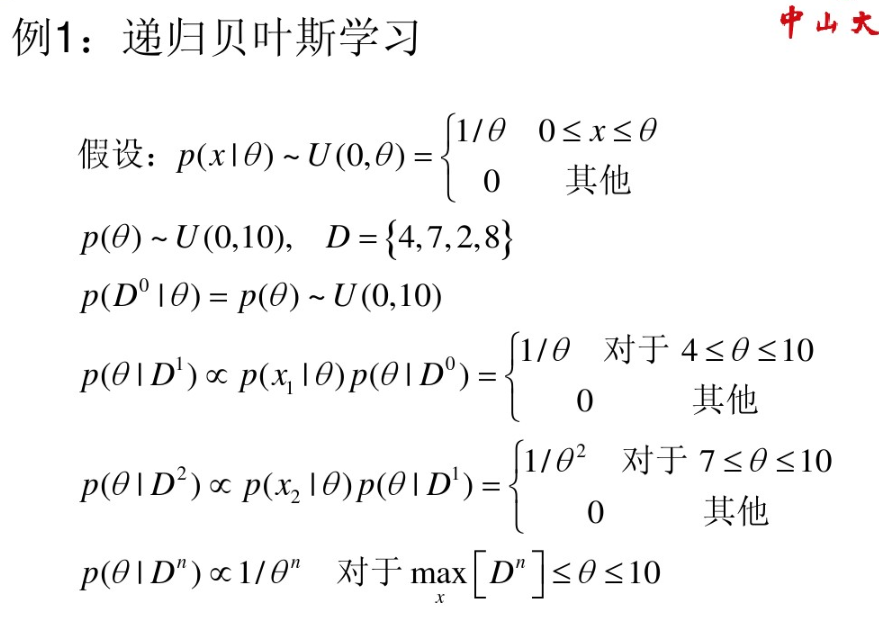    


In [67]:
# 非随机参数估计：迭代参数估计
x1=np.array([[0.,1.,1.,1.],
             [0.,0.,0.,1.],
             [0.,1.,0.,0.]])
x2=np.array([[0.,0.,0.,1.],
             [0.,1.,1.,1.],
             [1.,1.,0.,1.]])
m1=x1[:,0].reshape(x1.shape[0],1)
m2=x2[:,0].reshape(x2.shape[0],1)

C1=np.array([0]*9).reshape(3,3)
C2=np.array([0]*9).reshape(3,3)
n=x1.shape[1]
print(m1)
for k in range(1,n):
    print(k)
    m10=(float(k)*m1+x1[:,k].reshape(x1.shape[0],1))/float(k+1)
    m20=(float(k)*m2+x2[:,k].reshape(x2.shape[0],1))/float(k+1)
#     print((float(k)*C1+k*m1*m1.T+np.matmul(x1[:,k].reshape(x1.shape[0],1),x1[:,k].reshape(1,x1.shape[0]))))
    C1=(float(k)*C1+k*m1*m1.T+np.matmul(x1[:,k].reshape(x1.shape[0],1),x1[:,k].reshape(1,x1.shape[0])))/float(k+1)-m10*m10.T
    C2=(float(k)*C2+k*m2*m2.T+np.matmul(x2[:,k].reshape(x2.shape[0],1),x2[:,k].reshape(1,x2.shape[0])))/float(k+1)-m20*m20.T
    print(C1)
    print(16*C2)
    m1=m10
    m2=m20
    print(m1)
    print(m2)
    


[[0.]
 [0.]
 [0.]]
1
[[1. 0. 1.]
 [0. 0. 0.]
 [1. 0. 1.]]
[[0.25 0.   0.25]
 [0.   0.   0.  ]
 [0.25 0.   0.25]]
[[0. 0. 0.]
 [0. 4. 0.]
 [0. 0. 0.]]
[[0.5]
 [0. ]
 [0.5]]
[[0. ]
 [0.5]
 [1. ]]
2
[[2. 0. 1.]
 [0. 0. 0.]
 [1. 0. 1.]]
[[0.22222222 0.         0.11111111]
 [0.         0.         0.        ]
 [0.11111111 0.         0.22222222]]
[[ 0.          0.          0.        ]
 [ 0.          3.55555556 -1.77777778]
 [ 0.         -1.77777778  3.55555556]]
[[0.66666667]
 [0.        ]
 [0.33333333]]
[[0.        ]
 [0.66666667]
 [0.66666667]]
3
[[3. 1. 1.]
 [1. 1. 0.]
 [1. 0. 1.]]
[[ 0.1875  0.0625  0.0625]
 [ 0.0625  0.1875 -0.0625]
 [ 0.0625 -0.0625  0.1875]]
[[ 3.  1.  1.]
 [ 1.  3. -1.]
 [ 1. -1.  3.]]
[[0.75]
 [0.25]
 [0.25]]
[[0.25]
 [0.75]
 [0.75]]
